In [138]:
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
import seaborn as sns
from scipy.stats import probplot
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

In [139]:
digimon = pd.read_csv('DigiDB_digimonlist.csv')
moveslist = pd.read_csv('DigiDB_movelist.csv')
supportlist = pd.read_csv('DigiDB_supportlist.csv')

In [140]:
digimon.head(20)

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
0,1,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95
1,2,Pabumon,Baby,Free,Neutral,2,0,950,62,76,76,69,68
2,3,Punimon,Baby,Free,Neutral,2,0,870,50,97,87,50,75
3,4,Botamon,Baby,Free,Neutral,2,0,690,68,77,95,76,61
4,5,Poyomon,Baby,Free,Neutral,2,0,540,98,54,59,95,86
5,6,Koromon,In-Training,Free,Fire,3,0,940,52,109,93,52,76
6,7,Tanemon,In-Training,Free,Plant,3,0,1030,64,85,82,73,69
7,8,Tsunomon,In-Training,Free,Earth,3,0,930,54,107,92,54,76
8,9,Tsumemon,In-Training,Free,Dark,3,0,930,64,108,64,54,93
9,10,Tokomon,In-Training,Free,Neutral,3,0,640,86,76,74,74,103


In [141]:
moveslist.head(20)

,Move,SP Cost,Type,Power,Attribute,Inheritable,Description
0,Wolkenapalm I,3,Physical,65,Fire,Yes,"Physical attack, 65 Fire damage to one foe. 95..."
1,Wolkenapalm II,6,Physical,85,Fire,Yes,"Physical attack, 85 Fire damage to one foe. 95..."
2,Wolkenapalm III,9,Physical,105,Fire,Yes,"Physical attack, 105 Fire damage to one foe. 9..."
3,Burst Flame I,3,Magic,55,Fire,Yes,"Magic attack, 55 Fire damage to one foe. 95% a..."
4,Burst Flame II,6,Magic,75,Fire,Yes,"Magic attack, 75 Fire damage to one foe. 95% a..."
5,Burst Flame III,9,Magic,95,Fire,Yes,"Magic attack, 95 Fire damage to one foe. 95% a..."
6,Meteor Fall I,4,Physical,30,Fire,Yes,"Physical attack, 30 Fire damage to all foes. 9..."
7,Meteor Fall II,7,Physical,45,Fire,Yes,"Physical attack, 45 Fire damage to all foes. 9..."
8,Meteor Fall III,10,Physical,75,Fire,Yes,"Physical attack, 75 Fire damage to all foes. 9..."
9,Panic Wisp,10,Magic,30,Fire,Yes,"Magic attack, 30 Fire damage to one foe. Infli..."


In [142]:
supportlist.head(20)

,Name,Description
0,Adroit Wisdom,Increases INT by 15%.
1,All-Rounder,"Increases ATK, DEF, INT and SPD by 5%."
2,Analyze,Increases scan values by 10%.
3,Animal Colosseum,Increases damage from Earth skills by 15%.
4,Aus Generics,Increases SPD and EVA by 25% when HP drops bel...
5,Backwater Camp,"Increases damage given by 20%, but also increa..."
6,Battle Sense,Increases ATK by 50% when HP drops below 10%.
7,Blaster,Increases ATK by 10% and amount of HP received...
8,Bull's-Eye,Increases ACU by 15%.
9,Caledfwlch Dive,"Increases ACU and EVA by 5%, and CRT by 10%."


### **Task 1: Which set of moves will get best ratio of SP cost?**

In [143]:
moveslist['P/C Ratio']=round(moveslist['Power']/moveslist['SP Cost'],1)
moveslist.sort_values('P/C Ratio',ascending=False).head(10)

,Move,SP Cost,Type,Power,Attribute,Inheritable,Description,P/C Ratio
80,Heavy Strike I,3,Physical,70,Neutral,Yes,"Physical attack, 70 Neutral damage to one foe....",23.3
0,Wolkenapalm I,3,Physical,65,Fire,Yes,"Physical attack, 65 Fire damage to one foe. 95...",21.7
30,Nanomachine Break I,3,Physical,65,Thunder,Yes,"Physical attack, 65 Thunder damage to one foe....",21.7
40,Comet Hammer I,3,Physical,65,Earth,Yes,"Physical attack, 65 Earth damage to one foe. 9...",21.7
50,Wind Claw I,3,Physical,65,Wind,Yes,"Physical attack, 65 Wind damage to one foe. 95...",21.7
10,Ice Archery I,3,Physical,65,Water,Yes,"Physical attack, 65 Water damage to one foe. 9...",21.7
20,Crescent Leaf I,3,Physical,65,Plant,Yes,"Physical attack, 65 Plant damage to one foe. 9...",21.7
70,Destruction Cannon I,3,Physical,65,Dark,Yes,"Physical attack, 65 Dark damage to one foe. 95...",21.7
60,Saint Knuckle I,3,Physical,65,Light,Yes,"Physical attack, 65 Light damage to one foe. 9...",21.7
211,Hyper Cannon,10,Physical,200,Fire,No,"Physical attack, 200 Fire damage to one foe. C...",20.0


### **Task 2: Which team of 3 digimon have hte highest attack? And Defense?**

In [144]:
digimon.sort_values('Lv50 Atk',ascending=False).head(3)

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
243,244,Chaosmon,Ultra,Vaccine,Neutral,25,2,1080,129,318,94,89,188
235,236,Belphemon RM,Ultra,Virus,Dark,25,0,1780,84,247,168,109,140
195,196,Diaboromon,Mega,Free,Dark,20,2,1680,114,243,104,79,173


In [145]:
digimon.sort_values('Lv50 Def',ascending=False).head(3)

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
181,182,GroundLocomon,Mega,Data,Electric,18,3,1140,114,144,213,133,128
182,183,Craniamon,Mega,Vaccine,Earth,22,1,1630,143,124,208,134,124
238,239,Magnamon,Armor,Free,Earth,22,2,1240,124,168,208,148,124


### **Task 3: Are some attributes over- or under- represented?**

In [146]:
def Check(msg,ind):
    mean=digimon[msg].mean()
    i = digimon[msg][ind]
    if i<mean:
        return 'Weak'
    elif i>mean:
        return 'Strong'
    else:
        return 'Mean'

lv50=['Lv 50 HP','Lv50 SP','Lv50 Atk','Lv50 Def','Lv50 Int','Lv50 Spd']
lv={}

for i in lv50:
    lv[i]=[]
    for j in range(249):
        t=Check(i,j)
        lv[i].append(t)

temp_digi=pd.DataFrame(lv)

temp_digi['Attribute']=digimon['Attribute'].copy()


stats_dig={'Attribute':[]}

# Adding unique attributes to the temporary list stats_dig

for i in temp_digi['Attribute'].unique():
    stats_dig['Attribute'].append(i)

temp_dic={}

for i in lv50:
    temp_dic[i]=[0,0]
    stats_dig[i]=[]
    for k in stats_dig['Attribute']:
        for j,l in zip(temp_digi['Attribute'],temp_digi[i]):
            if k!=j:
                continue
            if l=='Weak':
                temp_dic[i][0]=temp_dic[i][0]+1
            else:
                temp_dic[i][1]=temp_dic[i][1]+1
        if temp_dic[i][0]/1.2<temp_dic[i][1]:
            stats_dig[i].append('Great')
        if temp_dic[i][0]/1.2>temp_dic[i][1]:
            stats_dig[i].append('Weak')
        if temp_dic[i][0]/1.2==temp_dic[i][1]:
            stats_dig[i].append('MID')

df_stats=pd.DataFrame(stats_dig)
df_stats    

,Attribute,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
0,Neutral,Weak,Weak,Great,Weak,Weak,Weak
1,Fire,Great,Weak,Great,Weak,Weak,Weak
2,Plant,Great,Weak,Great,Weak,Weak,Weak
3,Earth,Great,Weak,Great,Weak,Weak,Weak
4,Dark,Great,Weak,Great,Weak,Weak,Weak
5,Light,Great,Great,Weak,Weak,Weak,Great
6,Water,Great,Great,Weak,Weak,Great,Great
7,Wind,Great,Great,Weak,Weak,Weak,Great
8,Electric,Great,Weak,Weak,Weak,Weak,Great


### **Task 4: Are different Types and Attribute evenly represented across Stages?**

### Type across Stages below


In [147]:
### Attributes across Stages below


['Neutral' 'Fire' 'Plant' 'Earth' 'Dark' 'Light' 'Water' 'Wind' 'Electric']


<AxesSubplot:>

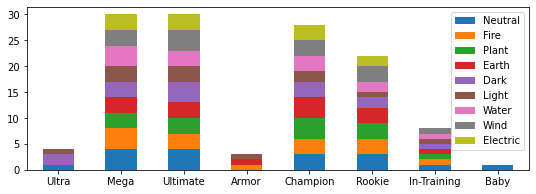

In [148]:
temp=tatype.groupby('Attribute').Stage.value_counts()
temp_list=[]
for i in range(tatype['Attribute'].nunique()):
    temp_list.append([])
    for j in range(len(xsubject)):
        temp_list[i].append(0)

print(tatype['Attribute'].unique())

for i in range(len(temp)):
    if temp.index[i][0]=='Neutral':
        asi(xsubject,i,0)

    if temp.index[i][0]=='Fire':
        asi(xsubject,i,1)

    if temp.index[i][0]=='Plant':
        asi(xsubject,i,2)

    if temp.index[i][0]=='Earth':
        asi(xsubject,i,3)

    if temp.index[i][0]=='Dark':
        asi(xsubject,i,4)

    if temp.index[i][0]=='Light':
        asi(xsubject,i,5)

    if temp.index[i][0]=='Water':
        asi(xsubject,i,6)

    if temp.index[i][0]=='Wind':
        asi(xsubject,i,7)

    if temp.index[i][0]=='Electric':
        asi(xsubject,i,8)

plo_df=pd.DataFrame({'Neutral':temp_list[0],'Fire':temp_list[1],'Plant':temp_list[2],'Earth':temp_list[3],'Dark':temp_list[4],'Light':temp_list[5],'Water':temp_list[6],'Wind':temp_list[7],'Electric':temp_list[8]},index=xsubject)
plo_df.plot.bar(rot=0,stacked=True,figsize=(9,3))

In [149]:
### **Task 4: Are different Types and Attribute evenly represented across Stages?**

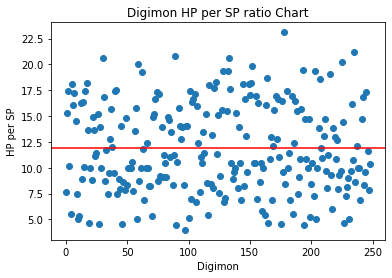

In [150]:
digimon['HP/SP'] = round(digimon['Lv 50 HP']/digimon['Lv50 SP'],2)
x=[]

for i in range(len(digimon['HP/SP'])):
    x.append(i)

y=digimon['HP/SP']

plt.axhline(y=digimon['HP/SP'].mean(),color='r',linestyle='-',label="Mean")
plt.scatter(x,y)
plt.xlabel('Digimon')
plt.ylabel('HP per SP')
plt.title('Digimon HP per SP ratio Chart')
plt.show()

In [151]:
moveslist['Attack Type']='None'
moveslist['Accuracy Rate']='100%'
moveslist['Attack Count']='1'

for i in range(len(moveslist['Description'])):                                                  
    if 'all foe' in moveslist['Description'][i] or 'to all' in moveslist['Description'][i]:     #Sorting through the attacks
        moveslist['Attack Type'][i] = 'all foe'                                                 # which attack either
                                                                                                #1 digimon or multiple
    if 'one foe' in moveslist['Description'][i]:
        moveslist['Attack Type'][i] = 'one foe'

    w = moveslist['Description'][i].split()                                                     
    if w[0].isnumeric():
            moveslist['Attack Count'][i] = 'w[0]'

    for j in range(len(w)):                                                                     #We are sifting through the
        if '%' in w[j]:                                                                         #desc to find the % 
            moveslist['Accuracy Rate'][i]=w[j]

moveslist=moveslist.reindex(columns=['Move','SP Cost','Type','Power','Attack Type','Attack Count','Accuracy Rate','Inheritable','P/C Ratio','Description'])

moveslist.head()

,Move,SP Cost,Type,Power,Attack Type,Attack Count,Accuracy Rate,Inheritable,P/C Ratio,Description
0,Wolkenapalm I,3,Physical,65,one foe,1,95%,Yes,21.7,"Physical attack, 65 Fire damage to one foe. 95..."
1,Wolkenapalm II,6,Physical,85,one foe,1,95%,Yes,14.2,"Physical attack, 85 Fire damage to one foe. 95..."
2,Wolkenapalm III,9,Physical,105,one foe,1,95%,Yes,11.7,"Physical attack, 105 Fire damage to one foe. 9..."
3,Burst Flame I,3,Magic,55,one foe,1,95%,Yes,18.3,"Magic attack, 55 Fire damage to one foe. 95% a..."
4,Burst Flame II,6,Magic,75,one foe,1,95%,Yes,12.5,"Magic attack, 75 Fire damage to one foe. 95% a..."


In [122]:
moveslist

,Move,SP Cost,Type,Power,Attack Type,Attack Count,Accuracy Rate,U
0,Wolkenapalm I,3,Physical,65,None,1,100%,NaN
1,Wolkenapalm II,6,Physical,85,None,1,100%,NaN
2,Wolkenapalm III,9,Physical,105,None,1,100%,NaN
3,Burst Flame I,3,Magic,55,None,1,100%,NaN
4,Burst Flame II,6,Magic,75,None,1,100%,NaN
...,...,...,...,...,...,...,...,...
382,Garuru Tomahawk,20,Physical,140,None,1,100%,NaN
383,Fist of Athena,50,Physical,0,None,1,100%,NaN
384,Supreme Cannon,30,Magic,130,None,1,100%,NaN
385,Dark Prominence,30,Magic,0,None,1,100%,NaN


In [109]:
w= moveslist['Description'][13].split()
for i in range(len(w)):
    if '%' in w[i]:
        print(w[i])


95%
